# Chapter 2: Deep Learning

## Your First Deep Neural Network

In the example below, we will be using an _artificial neural network_ (ANN) to classify images in the CIFAR-10 dataset.

In [1]:
%tensorflow_version 1.x
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

NUM_CLASSES = 10

# Scaling the values of the image data to the interval [0, 1].
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

TensorFlow 1.x selected.


Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step


### Building the Model

The two code cells below compare defining a neural network using Keras' sequential and functional APIs respectively.

In [2]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential([
  Dense(200, activation='relu', input_shape=(32, 32, 3)),
  Flatten(),
  Dense(150, activation='relu'),
  Dense(10, activation='softmax'),
])

In [0]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model

input_layer = Input(shape=(32, 32, 3))
flatten_layer = Flatten()(input_layer)
hidden1 = Dense(units=200, activation='relu')(flatten_layer)
hidden2 = Dense(units=150, activation='relu')(hidden1)
output_layer = Dense(units=10, activation='softmax')(hidden2)

model = Model(input_layer, output_layer)

As the name suggests, the `Input` layer is the entry point into the network. The `Flatten` layer flattens a multidimensional input into a single-dimensional output. The `Dense` layers are fully connected layers which multiply inputs by a weight and then applies a nonlinear _activation_ function to the output.

The activation functions we are most interested are the rectified linear unit (ReLU) function:

$$ \text{ReLU}(x) = \max(0,x) $$

The leaky ReLU function:

$$ \text{LeakyReLU}(x) = \left\{ \begin{matrix} x && \text{if}\;x\geq0 \\ \alpha x && \text{otherwise} \end{matrix} \right. $$

where $\alpha$ is a positive constant whose value is close to zero. There is also the sigmoid function:

$$ S(x) = \left(1 + e^{-x} \right)^{-1} $$

Finally, there is the softmax function, where each output, $y_i$, is given by

$$ y_i = \frac{e^{x_i}}{\sum\limits_j e^{x_j}}. $$

You can use the `model.summary()` method to get information about the different layers in the model and check that the layers are the correct shape:

In [4]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_5 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


### Compiling the Model

Below is an example of compiling a model using [Adam](https://arxiv.org/abs/1401.7020). For a loss function we choose the _categorical crossentropy_ defined below:

In [0]:
from keras.optimizers import Adam

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
              metrics=['accuracy'])

Another loss function is the _mean squared error_ (MSE) function:

$$ MSE = \frac{1}{n}\sum\limits_{i\,=\,1}^n \left(y_i - p_i\right)^2 $$

where $y_i$ is the actual value $p_i$ is the predicted value. The loss function the model is using, categorical crossentropy is defined as

$$ -\sum\limits_{i\,=\,1}^n y_i \log p_i. $$

For a binary classification problem, you can use the _binary crossentropy function_, defined as

$$ - \sum\limits_{i\,=\,1}^n \left( y_i \log p_i + \left(1 - y_i \right) \log \left( 1 - p_i \right) \right) $$.

### Training the Model

Below is an example of training a model using Keras:

In [0]:
model.fit(X_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
50000/50000 [==============================] - 17s 335us/step - loss: 1.7146 - acc: 0.3868
Epoch 2/10
50000/50000 [==============================] - 16s 328us/step - loss: 1.6027 - acc: 0.4274
Epoch 3/10
50000/50000 [==============================] - 17s 332us/step - loss: 1.5465 - acc: 0.4489
Epoch 4/10
50000/50000 [==============================] - 17s 339us/step - loss: 1.5049 - acc: 0.4616
Epoch 5/10
50000/50000 [==============================] - 16s 326us/step - loss: 1.4676 - acc: 0.4787
Epoch 6/10
50000/50000 [==============================] - 16s 323us/step - loss: 1.4336 - acc: 0.4909
Epoch 7/10
50000/50000 [==============================] - 16s 321us/step - loss: 1.4076 - acc: 0.4974
Epoch 8/10
50000/50000 [==============================] - 16s 316us/step - loss: 1.3851 - acc: 0.5060
Epoch 9/10
50000/50000 [==============================] - 16s 312us/step - loss: 1.3638 - acc: 0.5147
Epoch 10/10
50000/50000 [==============================] - 16s 313us/step - loss: 

### Evaluating the Model

We can find out how our model performs on new data using `model.evaluate()` and see the model predicts the test set with 48.25% accuracy:

In [0]:
# Returns [categorical crossentropy, accuracy]
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 73us/step


[1.4441048515319823, 0.4825]

We can view some of the predictions on the test set by using the `model.predict()` method:

In [0]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
                    'frog', 'horse', 'ship', 'truck'])

y_pred = model.predict(X_test)
y_pred_1d = CLASSES[np.argmax(y_pred, axis=-1)]
y_test_1d = CLASSES[np.argmax(y_test, axis=-1)]

We can then plot some of the images in the test set next to their predicted and actual values:

ERROR! Session/line number was not unique in database. History logging moved to new session 60


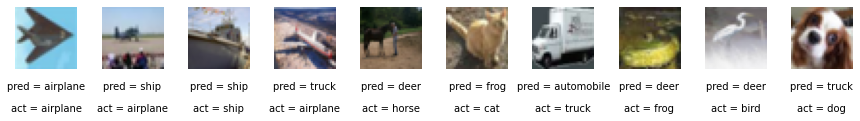

In [0]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
  img = X_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(y_pred_1d[idx]), fontsize=10, ha='center',
          transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(y_test_1d[idx]), fontsize=10, ha='center',
          transform=ax.transAxes)
  ax.imshow(img)

## Improving the Model

The ANN above flattens the input to a 1-dimensional vector, and this does not allow the model to learn the dependence of the features in the images in both dimensions. In order to do so, we can use a _convolutional layer_.

### Convolutional Layers

Below is an example of using a 2D convolutional layer with Keras that can apply a couple filters. This code is not in the book and is based on [this Stack Overflow question](https://stackoverflow.com/questions/44410135/keras-conv2d-own-filters).

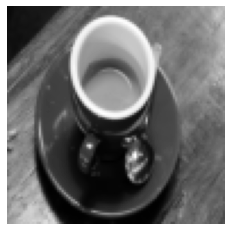

In [8]:
from keras.layers import Conv2D
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import resize

img = rgb2gray(data.coffee())
img = resize(img, (32 * 3, 32 * 3))

plt.axis('off')
plt.imshow(img, cmap='gray')

Below is code that is applying a vertical filter to the original coffee image:

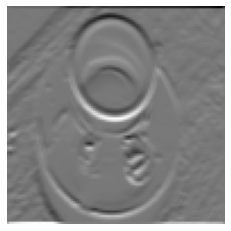

In [10]:
def kernel_init(shape, dtype=None):
  return np.array([[ 1.0,  1.0,  1.0],
                   [ 0.0,  0.0,  0.0],
                   [-1.0, -1.0, -1.0]]).reshape((3, 3, 1, 1))

def apply_filter():
  input_layer = Input(shape=(32 * 3, 32 * 3, 1))
  conv_layer = Conv2D(filters=1, kernel_size=(3, 3), strides=1,
                      padding='same', kernel_initializer=kernel_init)(input_layer)
  model = Model(input_layer, conv_layer)

  new_img = model.predict(img.reshape((1, 32 * 3, 32 * 3, 1)))
  plt.axis('off')
  plt.imshow(new_img.reshape(32 * 3, 32 * 3), cmap='gray')

apply_filter()

Below is the image after applying a horizontal filter:

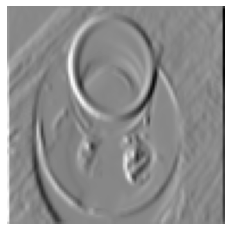

In [11]:
def kernel_init(shape, dtype=None):
  return np.array([[-1.0,  0.0,  1.0],
                   [-1.0,  0.0,  1.0],
                   [-1.0,  0.0,  1.0]]).reshape((3, 3, 1, 1))
apply_filter()

Below is an example of building a _convolutional neural network_ (CNN) to predict the labels of the CIFAR-10 dataset:

In [12]:
X = Input(shape=(32, 32, 3))

conv1 = Conv2D(filters=10, kernel_size=(4, 4), strides=2, padding='same')(X)
conv2 = Conv2D(filters=20, kernel_size=(3, 3), strides=2, padding='same')(conv1)

flatten = Flatten()(conv2)
output = Dense(units=10, activation='softmax')(flatten)

model = Model(X, output)

model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_3 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


### Batch Normalization

When you train a neural network, it is possible for the weights of some layers to get very large, which can cause the loss function to become dominated by a few terms or become undefined. This is known as the _exploding gradient problem_. This is due to the fact that randomly initialized weights can sometimes become very large even after training has gone on successfully for some time, a phenomenon known as _covariate shift_.

_Batch normalization_ is a solution to the exploding gradient problem that keeps the weights of the neurons in check. It works using the following algorithm:

1. Let $B = \{x_1,...,x_m\}$ be the output value of a previous layer for a training batch of size $m$.

2. First we calculate the mean value ovr the batch

$$ \mu_B = \frac{1}{m}\sum\limits_{i\,=\,1}^m x_i $$

3. Then we compute the variance of the batch

$$ \sigma_B^2 = \frac{1}{m}\sum\limits_{i\,=\,1}^m \left( x_i - \mu_B \right)^2 $$

4. We then subtract the mean and divide by the standard deviation plus a small constant, $\epsilon$, to prevent division by zero

$$ \hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma_B + \epsilon}} $$

5. Finally, the output of the batch normalization layer is given by

$$ y_i = \gamma\hat{x}_i + \beta = \text{BN}_{\gamma,\beta}(x) $$

where $\gamma$ and $\beta$ are trainable parameters. The BN layer keeps a moving average of the mean and variance to use while making predictions.

Below is an example of creating a batch normalization layer with Keras:

In [0]:
from keras.layers import BatchNormalization

bn_layer = BatchNormalization(momentum=0.9)

where `momentum` is the weight given to the previous value of the moving average and variance.

### Dropout Layers

A model is _overfitting_ if it makes predictions more accurately for the training set than it does for the test set. This means the model only learned features present in the training set without being able to generalize.

_Regularization_ is a set of techniques used to make a model overfit less by penalizing it during training for not learning to generalize. An example of regularization is _dropout layers_, which during training only will randomly set the output of the previous layer to zero. This forces the model to learn general features and to not rely to heavily on connections between specific neurons.

Below is an example of a dropout layer with Keras:

In [0]:
from keras.layers import Dropout

dropout_layer = Dropout(rate=0.25)

### Putting it All Together

Below is an example of a convolutional neural network that uses batch normalization and dropout to label the CIFAR-10 dataset:

In [0]:
from keras.layers import LeakyReLU, Activation

input_layer = Input((32, 32, 3))

conv1 = Conv2D(filters=32, kernel_size=3, strides=1,
               padding='same')(input_layer)
bn1 = BatchNormalization()(conv1)
activation1 = LeakyReLU()(bn1)

conv2 = Conv2D(filters=32, kernel_size=3, strides=2,
               padding='same')(activation1)
bn2 = BatchNormalization()(conv2)
activation2 = LeakyReLU()(bn2)

conv3 = Conv2D(filters=64, kernel_size=3, strides=1,
               padding='same')(activation2)
bn3 = BatchNormalization()(conv3)
activation3 = LeakyReLU()(bn3)

conv4 = Conv2D(filters=64, kernel_size=3, strides=2,
               padding='same')(activation3)
bn4 = BatchNormalization()(conv4)
activation4 = LeakyReLU()(bn4)

flatten_layer = Flatten()(activation4)

hidden_dense_layer = Dense(128)(flatten_layer)
bn5 = BatchNormalization()(hidden_dense_layer)
activation5 = LeakyReLU()(bn5)
dropout_layer = Dropout(rate=0.25)(activation5)

logits = Dense(NUM_CLASSES)(dropout_layer)
output_layer = Activation('softmax')(logits)

model = Model(input_layer, output_layer)

In [18]:
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 16, 16, 32)        0   

Now we compile and train the model.

In [0]:
opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, batch_size=32, epochs=10, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
50000/50000 [==============================] - 180s 4ms/step - loss: 1.4366 - acc: 0.4914
Epoch 2/10
50000/50000 [==============================] - 173s 3ms/step - loss: 1.0802 - acc: 0.6172
Epoch 3/10
50000/50000 [==============================] - 163s 3ms/step - loss: 0.9325 - acc: 0.6727
Epoch 4/10
50000/50000 [==============================] - 163s 3ms/step - loss: 0.8409 - acc: 0.7060
Epoch 5/10
50000/50000 [==============================] - 165s 3ms/step - loss: 0.7743 - acc: 0.7290
Epoch 6/10
50000/50000 [==============================] - 162s 3ms/step - loss: 0.7175 - acc: 0.7484
Epoch 7/10
50000/50000 [==============================] - 160s 3ms/step - loss: 0.6636 - acc: 0.7656
Epoch 8/10
50000/50000 [==============================] - 160s 3ms/step - loss: 0.6194 - acc: 0.7832
Epoch 9/10
50000/50000 [==============================] - 158s 3ms/step - loss: 0.5819 - acc: 0.

We use `model.evaluate` to see that this model achieves 71.46% accuracy on the test set, a pretty major improvement from the last model.

In [21]:
# Returns [categorical crossentropy, accuracy]
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 14s 1ms/step


[0.8300818123817444, 0.7146]

Let's plot some of the model's predictions on some sample images next to their actual label. Here we also see a dramatic improvement over the last model.

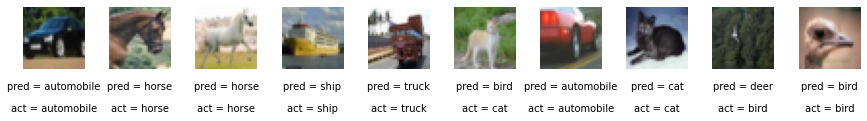

In [23]:
y_pred = model.predict(X_test)
y_pred_1d = CLASSES[np.argmax(y_pred, axis=-1)]
y_test_1d = CLASSES[np.argmax(y_test, axis=-1)]

n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
  img = X_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(y_pred_1d[idx]), fontsize=10, ha='center',
          transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(y_test_1d[idx]), fontsize=10, ha='center',
          transform=ax.transAxes)
  ax.imshow(img)